# Pytorch Neural Network for Customer Churn Predictions
### Customer Churn Pytorch
#### Elijah C
For this project, I am using a dataset for Telco customer churn from Kaggle. The goal is for me to to build a neural network with PyTorch, fine-tune parameters, and try to get the best performing model I can with this dataset and deep learning approach. By the end, I want to refine my understanding of PyTorch and build a reasonably high performing model

## Load the Telco Customer Churn dataset

In [3]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd

data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing
### Handle missing values, encode categorical variables, and scale numerical features.


In [5]:
# Drop rows with empty entries 
data = data[data['TotalCharges'].str.strip() != '']

# Drop unnecessary columns
data = data.drop(["customerID"], axis=1)

#Ensure only numeric datatypes are int
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Encode the target column
label_encoder = LabelEncoder()
data["Churn"] = label_encoder.fit_transform(data["Churn"])  # Target: 0 (No), 1 (Yes)

# One-hot encode other categorical columns
data = pd.get_dummies(data, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Convert to NumPy arrays
X_df = data.drop("Churn", axis=1)
y_df = data["Churn"]
X = X_df.values.astype(np.float32)
y = y_df.values.astype(np.float32)

X_df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.280248,-1.161694,-0.994194,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0.064303,-0.260878,-0.173740,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,-1.239504,-0.363923,-0.959649,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0.512486,-0.747850,-0.195248,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.239504,0.196178,-0.940457,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [7]:
y_df.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

## Train Validation Test Split

In [8]:
from sklearn.model_selection import train_test_split

# Split data into train (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Convert the data to PyTorch tensors:

In [9]:
import torch

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


## Define the Neural Network

In [10]:
import torch.nn as nn

class BinaryClassModel(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(.3)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.sigmoid(self.fc6(x))
        return x


In [11]:
input_dim = X_train.shape[1]
model = BinaryClassModel(input_dim)

## Define Loss Function and Optimizer

In [12]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

## Train the Model

In [13]:
num_epochs = 250
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True
)

losses = []  # Store losses here during training for each epoch

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0  # To track the total loss for the epoch

    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss
        epoch_loss += loss.item()


    # Average loss for the epoch
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [10/250], Loss: 0.3885
Epoch [20/250], Loss: 0.3416
Epoch [30/250], Loss: 0.2829
Epoch [40/250], Loss: 0.2273
Epoch [50/250], Loss: 0.1891
Epoch [60/250], Loss: 0.1765
Epoch [70/250], Loss: 0.1529
Epoch [80/250], Loss: 0.1491
Epoch [90/250], Loss: 0.1205
Epoch [100/250], Loss: 0.1257
Epoch [110/250], Loss: 0.1214
Epoch [120/250], Loss: 0.1172
Epoch [130/250], Loss: 0.1148
Epoch [140/250], Loss: 0.1060
Epoch [150/250], Loss: 0.1096
Epoch [160/250], Loss: 0.1035
Epoch [170/250], Loss: 0.1031
Epoch [180/250], Loss: 0.0922
Epoch [190/250], Loss: 0.1025
Epoch [200/250], Loss: 0.0961
Epoch [210/250], Loss: 0.0867
Epoch [220/250], Loss: 0.1027
Epoch [230/250], Loss: 0.0869
Epoch [240/250], Loss: 0.0925
Epoch [250/250], Loss: 0.0869


In [14]:
model.eval()
with torch.no_grad():
    y_pred = model(X_train)
    y_pred_classes = (y_pred >= 0.5).float()
    accuracy = (y_pred_classes.eq(y_train).sum() / y_train.shape[0]).item()
    print(f"Training Accuracy: {accuracy:.2f}")


Training Accuracy: 0.96


# Evaluate the Model with Validation Set

In [15]:
model.eval()
with torch.no_grad():
    y_pred = model(X_val)
    y_pred_classes = (y_pred >= 0.5).float()
    accuracy = (y_pred_classes.eq(y_val).sum() / y_val.shape[0]).item()
    print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.75


## Visualize  Model Performance

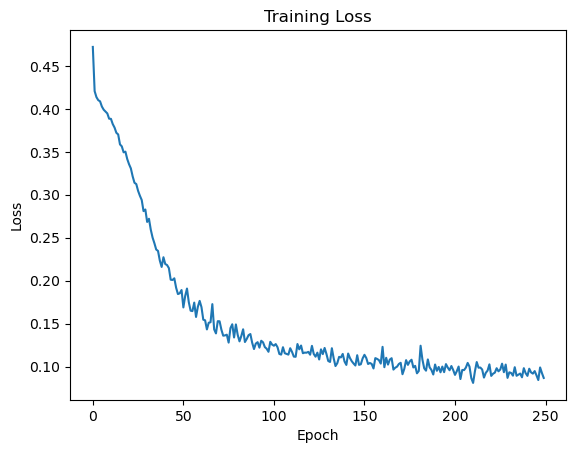

In [16]:
import matplotlib.pyplot as plt


# (Inside the training loop, append loss.item() to the list `losses`)

plt.plot(range(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


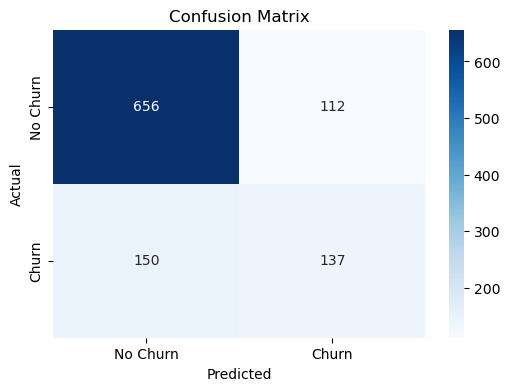

In [17]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_val.numpy(), y_pred_classes.numpy())

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_val.numpy(), y_pred_classes.numpy(), target_names=["No Churn", "Churn"]))


              precision    recall  f1-score   support

    No Churn       0.81      0.85      0.83       768
       Churn       0.55      0.48      0.51       287

    accuracy                           0.75      1055
   macro avg       0.68      0.67      0.67      1055
weighted avg       0.74      0.75      0.75      1055



# Not the results we wanted... The model does not perform much better than random guessing. 
We got an accuracy of about 75%. Baseline accuracy (guessing randomly) was 73%. 

# Let's try again, this time with more data preprocessing, upsampling the data (to handle class imbalance), and a different network architecture. 

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import resample
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Telco-Customer-Churn.csv")

## New Preprocessing Techinque
We are going to fill missing values instead of deleteing them (with mode for categorical, median for numeric), one-hot encode all categorical data using Sklearn, scale numeric data, and address class imbalances by resampling minority class to have same number of entries as majority

In [64]:
# Preprocessing
# Drop irrelevant columns
data = data.drop(columns=['customerID'])

# Handle missing values
# Replace ' ' with NaN, then fill missing values with mode for categorical and median for numerical
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].replace(' ', np.nan)
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
one_hot = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = one_hot.fit_transform(data[categorical_columns])
categorical_df = pd.DataFrame(categorical_data, columns=one_hot.get_feature_names_out())

# Standardize numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
numerical_data = scaler.fit_transform(data[numerical_columns])
numerical_df = pd.DataFrame(numerical_data, columns=numerical_columns)

# Combine processed data
data = pd.concat([numerical_df, categorical_df], axis=1)
X = data.drop(columns=['Churn_Yes'])  # New column name "Churn" -> Churn_Yes" after one-hot encoding
y = data['Churn_Yes']

# Address class imbalance using upsampling
X['Churn_Yes'] = y
majority_class = X[X['Churn_Yes'] == 0]
minority_class = X[X['Churn_Yes'] == 1]

minority_upsampled = resample(minority_class, 
                               replace=True, 
                               n_samples=len(majority_class), 
                               random_state=42)

X_balanced = pd.concat([majority_class, minority_upsampled])
X = X_balanced.drop(columns=['Churn_Yes'])
y = X_balanced['Churn_Yes']

In [71]:
y.value_counts()

Churn_Yes
0.0    5174
1.0    5174
Name: count, dtype: int64

## Training split and convert data to PyTorch tensors

In [65]:
# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

## Define the new model, loss function & optimizer

In [66]:
# Define the neural network class
class ChurnPredictor(nn.Module):
    def __init__(self, input_dim):
        super(ChurnPredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = ChurnPredictor(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-2)

## Train the new model

In [67]:
# Train the model
def train_model(model, X_train, y_train, criterion, optimizer, epochs=50):
    for epoch in range(epochs):
        model.train()

        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Train
train_model(model, X_train_tensor, y_train_tensor, criterion, optimizer, epochs=250)



Epoch [10/250], Loss: 0.3104
Epoch [20/250], Loss: 0.1157
Epoch [30/250], Loss: 0.0490
Epoch [40/250], Loss: 0.0304
Epoch [50/250], Loss: 0.0246
Epoch [60/250], Loss: 0.0211
Epoch [70/250], Loss: 0.0196
Epoch [80/250], Loss: 0.0167
Epoch [90/250], Loss: 0.0142
Epoch [100/250], Loss: 0.0152
Epoch [110/250], Loss: 0.0126
Epoch [120/250], Loss: 0.0135
Epoch [130/250], Loss: 0.0111
Epoch [140/250], Loss: 0.0123
Epoch [150/250], Loss: 0.0112
Epoch [160/250], Loss: 0.0116
Epoch [170/250], Loss: 0.0361
Epoch [180/250], Loss: 0.0234
Epoch [190/250], Loss: 0.0168
Epoch [200/250], Loss: 0.0155
Epoch [210/250], Loss: 0.0140
Epoch [220/250], Loss: 0.0123
Epoch [230/250], Loss: 0.0116
Epoch [240/250], Loss: 0.0118
Epoch [250/250], Loss: 0.0117


## Evaluate new model on validation set

Accuracy: 0.9246
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       776
         1.0       0.91      0.95      0.93       776

    accuracy                           0.92      1552
   macro avg       0.93      0.92      0.92      1552
weighted avg       0.93      0.92      0.92      1552



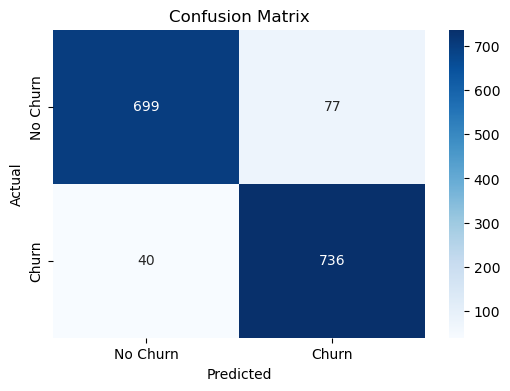

In [68]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        predictions = (predictions > 0.5).float()
        accuracy = accuracy_score(y_test, predictions)
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, predictions))
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

# Evaluate
evaluate_model(model, X_val_tensor, y_val_tensor)


# The new model performs much better. With an accuracy of about 90%, it can safely be said that the model is able to predict customer churn with a reasonable degree of accuracy

Accuracy: 0.9189
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       777
         1.0       0.90      0.94      0.92       776

    accuracy                           0.92      1553
   macro avg       0.92      0.92      0.92      1553
weighted avg       0.92      0.92      0.92      1553



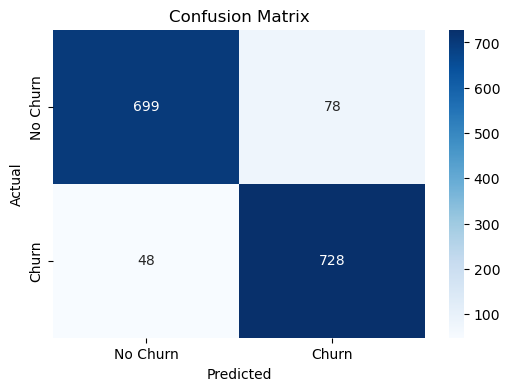

In [69]:
# Final evaluation
evaluate_model(model, X_test_tensor, y_test_tensor)

# Model achieved a 92% test accuracy. Much better than the baseline of 73%. Now we can save the final model

In [70]:
#torch.save(model.state_dict(), "telco-churn_model.pth")